In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
df = pd.read_csv("/Users/mdshalique/Downloads/practicePythonOP/ProjectsOP/Diabetes_Prediction/diabetes.csv")

In [38]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [39]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())
# df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())
# df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())
# df["Insulin"] = df["Insulin"].fillna(df["Insulin"].mean())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].median())
df["BMI"] = df["BMI"].replace(0,df["BMI"].mean())

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

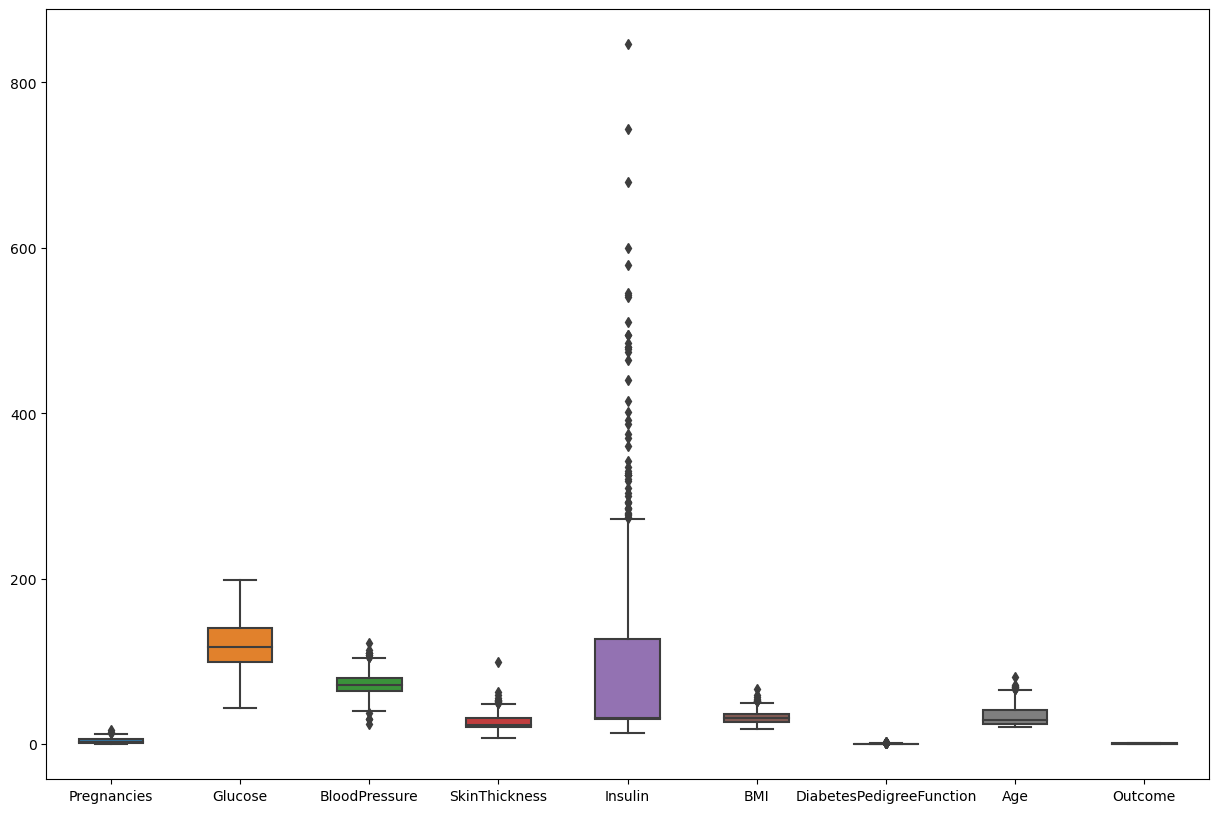

In [44]:
# Visualize
fig,axis = plt.subplots(figsize = (15,10))
sns.boxplot(data = df,width = 0.5,ax = axis)

In [45]:
Q1 = df["Insulin"].quantile(0.25)
Q3 = df["Insulin"].quantile(0.75)
IQR = Q3 - Q1

median_insulin = df["Insulin"].median()

df["Insulin"] = np.where((df["Insulin"] > Q3 + 1.5 * IQR) | (df["Insulin"] < Q1 - 1.5 * IQR),
                         median_insulin, df["Insulin"])

<Axes: >

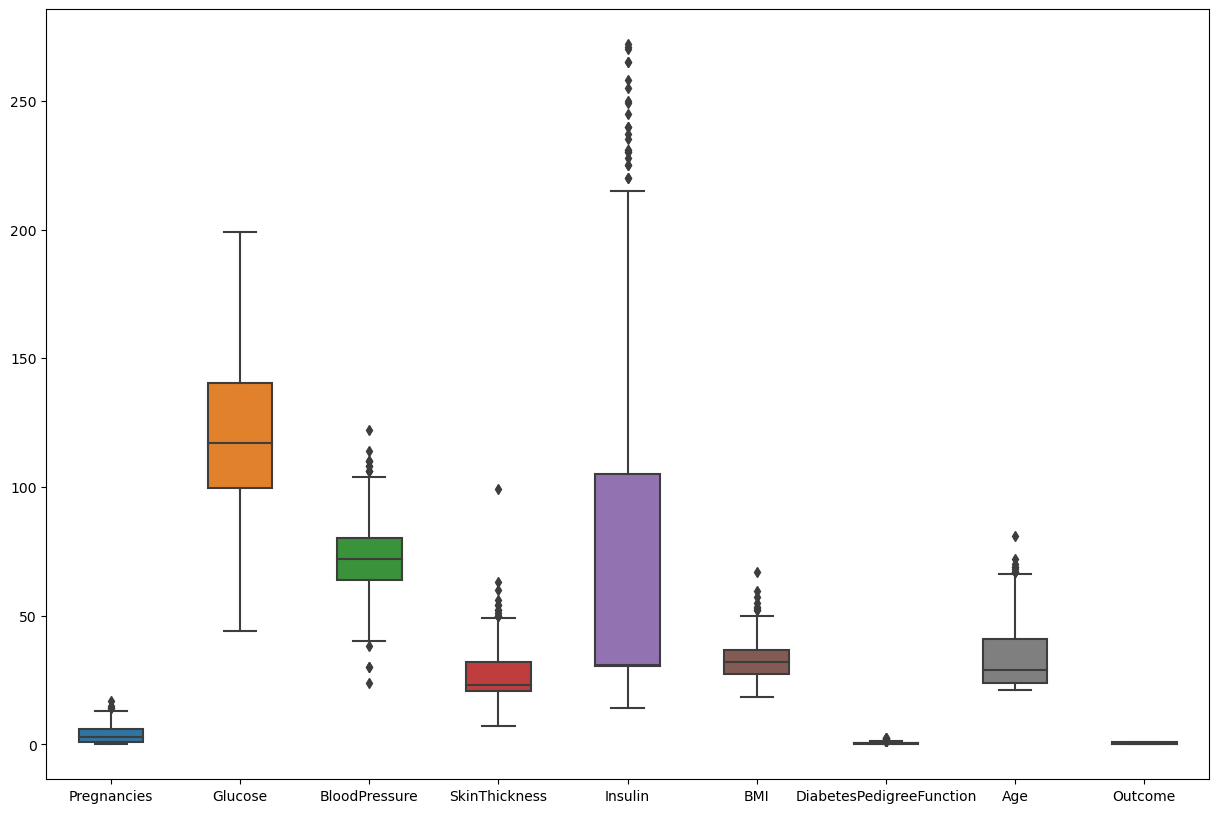

In [46]:
fig,axis = plt.subplots(figsize = (15,10))
sns.boxplot(data = df,width = 0.5,ax = axis)

In [47]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [49]:
X_train.shape

(614, 8)

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

<Axes: >

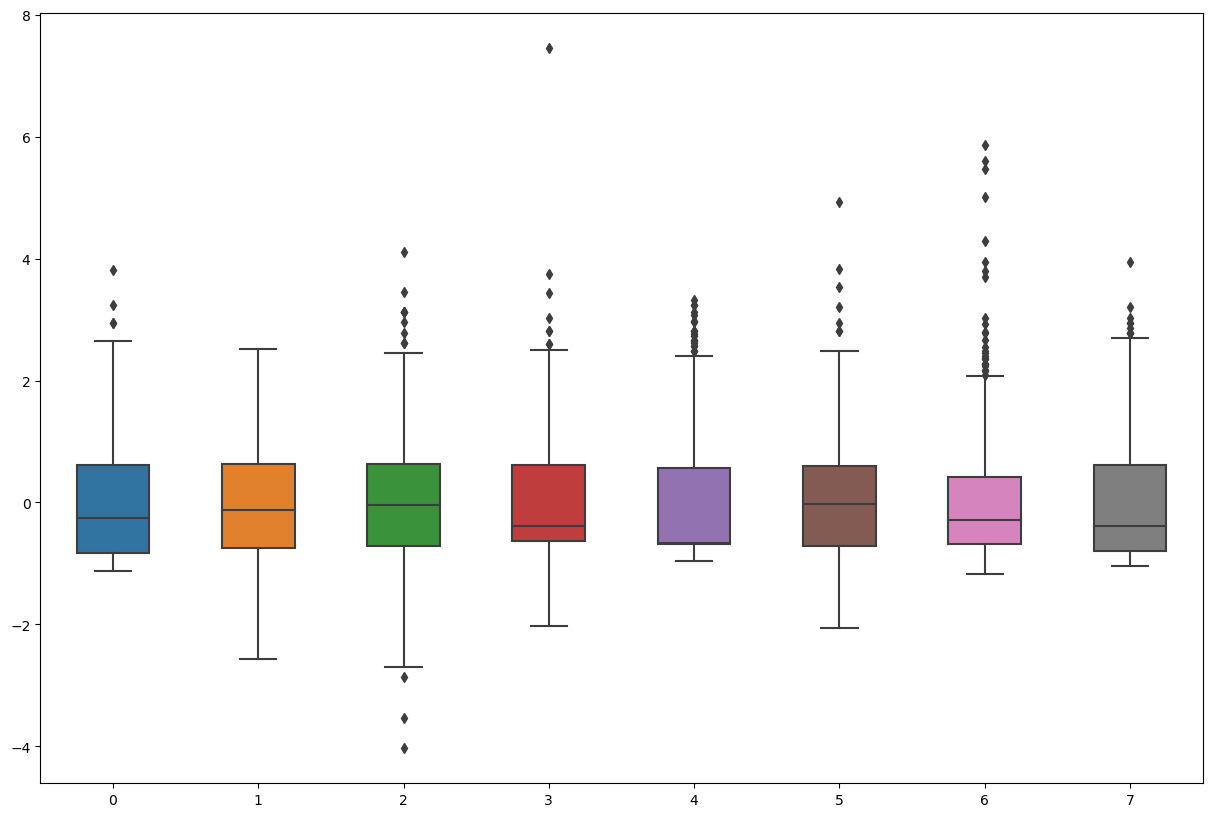

In [51]:
# Visualize
fig,axis = plt.subplots(figsize = (15,10))
sns.boxplot(data = X_train_Scaled,width = 0.5,ax = axis)

# Logistic Regression

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 100)

parameters = {
    'penalty': ['l1', 'l2'],           
    'C': [1,10,20,30],    
    'solver': ['liblinear', 'saga']
}

model_Final = GridSearchCV(model, param_grid=parameters,scoring = "accuracy", cv = 10)

model_Final.fit(X_train_Scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [53]:
model_Final.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [54]:
model_Final.best_score_

0.7539925965097831

In [74]:
y_predLR = model_Final.predict(X_test_Scaled)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_predLR,y_test))
print(accuracy_score(y_predLR,y_test))
print(classification_report(y_predLR,y_test))

[[97 19]
 [10 28]]
0.8116883116883117
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       116
           1       0.60      0.74      0.66        38

    accuracy                           0.81       154
   macro avg       0.75      0.79      0.76       154
weighted avg       0.83      0.81      0.82       154



# Decision Trees

In [57]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameterDT={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [58]:
dTC = DecisionTreeClassifier()
classifierDT = GridSearchCV(estimator=dTC,param_grid=parameterDT,cv=5,verbose = 3)
classifierDT.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [59]:
classifierDT.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [60]:
classifierDT = DecisionTreeClassifier(criterion= 'gini',max_depth = 4, max_features = 'log2',splitter = 'best')
classifierDT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features='log2')

In [61]:
y_predDT = classifierDT.predict(X_test)

In [62]:
print(confusion_matrix(y_predDT,y_test))
print(accuracy_score(y_predDT,y_test))
print(classification_report(y_predDT,y_test))

[[73 16]
 [34 31]]
0.6753246753246753
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        89
           1       0.66      0.48      0.55        65

    accuracy                           0.68       154
   macro avg       0.67      0.65      0.65       154
weighted avg       0.67      0.68      0.66       154



# SVC

In [66]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [67]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=3,verbose=3,scoring='accuracy')

grid.fit(X_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.780 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.766 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.780 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [68]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [69]:
svc_clf=SVC(C=0.1,gamma=1,kernel='linear')
svc_clf.fit(X_train,y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [72]:
y_predSVC = svc_clf.predict(X_test)

In [73]:
print(confusion_matrix(y_predSVC,y_test))
print(accuracy_score(y_predSVC,y_test))
print(classification_report(y_predSVC,y_test))

[[97 20]
 [10 27]]
0.8051948051948052
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       117
           1       0.57      0.73      0.64        37

    accuracy                           0.81       154
   macro avg       0.74      0.78      0.75       154
weighted avg       0.83      0.81      0.81       154



# Comparing all 3 Models

In [76]:
print("Logistic Regression : ",accuracy_score(y_predLR,y_test))
print("Decision Trees : ", accuracy_score(y_predDT,y_test))
print("Support Vector Classifier : ", accuracy_score(y_predSVC,y_test))

Logistic Regression :  0.8116883116883117
Decision Trees :  0.6753246753246753
Support Vector Classifier :  0.8051948051948052


In [63]:
import pickle
file = open("/Users/mdshalique/Downloads/practicePythonOP/ProjectsOP/Diabetes_Prediction/Model/StandardScaler.pkl","wb")
pickle.dump(scaler,file)
file.close()

In [64]:
file = open("/Users/mdshalique/Downloads/practicePythonOP/ProjectsOP/Diabetes_Prediction/Model/DiabetesModel.pkl","wb")
pickle.dump(model_Final,file)
file.close()